# Lezione 1

Approccio: analisi esplorativa dei dati, non partendo da un algoritmo -> compilazione -> esecuzione -> debug. Si usano i notebook (Anaconda, Python3).
Per runnare il notebook: `jupyter-notebook.exe`.
Le celle di codice vengono runnate, ma solo il risultato dell'ultima riga viene mostrato. Tipi di dati Python3 sono: `int, bool, float, string`. Per capire il tipo: `type()`. In realtà Python chiama sempre il costruttore `int()`. 
Il typechecking in Python è dinamico. I booleani vanno scritti con la inziale maiuscola: `True, False`.
Gli operatori: `+, -, *, / (Reale), // (Intera), %, **, ==, !=, <, >, <=, >=`.

In [1]:
var = 120
t = type(var)
t("123")

123

### Dati strutturati
Python non ha array (dimensione prefissata ed omogenei). Ha invece: 
- **Liste**: struttura dati eterogenea ad accesso posizionale. Le liste possono essere usate come argomenti di operatori, argomenti di funzioni e oggetti su cui invocare metodi.

In [2]:
lst = [1, "hello", 4.5, True]
print("list: " + str(lst))
print("list[0]: " + str(lst[0]))
print("list[-1]: " + str(lst[-1]))
print("list[0:2]: " + str(lst[0:2])) #slice di lista
print("1 in list: " + str(1 in lst)) #operatore per lista in
del lst[1] #operatore del: elimina quello che è contenuto nella posizione della lista
print("del list[1]: " + str(lst))
print("len(list): " + str(len(lst)))
lst.sort()
print("list.sort(): " + str(lst))
print("list[1:]: " + str(lst[1:])) #slicing parziale
lst.sort(reverse=True)
print("list.sort(reverse=True): " + str(lst)) #argomento nominale - ha valore di default
names = ["Simone", "Tea", "Federico", "Dario"]
names.sort()
print("names.sort(): " + str(names))
names.sort(key=len) #passo funzione come chiave di ordinamento
print("names.sort(key=len): " + str(names))
succ = lambda n: n+1 #funzione anonima, possono anche essere usate come (lambda n: n+1) (2)
print("succ(2): " + str(succ(2)))
names.insert(1, "Jack")
print("names.insert(1, \"Jack\"): " + str(names)) #inserisce in posizione

list: [1, 'hello', 4.5, True]
list[0]: 1
list[-1]: True
list[0:2]: [1, 'hello']
1 in list: True
del list[1]: [1, 4.5, True]
len(list): 3
list.sort(): [1, True, 4.5]
list[1:]: [True, 4.5]
list.sort(reverse=True): [4.5, 1, True]
names.sort(): ['Dario', 'Federico', 'Simone', 'Tea']
names.sort(key=len): ['Tea', 'Dario', 'Simone', 'Federico']
succ(2): 3
names.insert(1, "Jack"): ['Tea', 'Jack', 'Dario', 'Simone', 'Federico']


- **Tupla**: come la lista, ma non mofidicabile. Si indica con le parentesi tonde. Le stringhe sono tuple di caratteri.

In [3]:
tuple = (1, 3., "Simox")
print(tuple)
print(tuple[-1:])
print(tuple[2][0:4])
triple_apostrophe_string = '''prima linea
seconda linea
terza linea
''' #stringhe multilinea, utilizzate anche per documentazione per funzioni
print(triple_apostrophe_string)

(1, 3.0, 'Simox')
('Simox',)
Simo
prima linea
seconda linea
terza linea



- **Insiemi**: si perde il concetto di posizione, non di indice. Sono introdotti con le parentesi graffe.
- **Dizionari**: array associativi, ovvero un mapping tra chiave e valori. Sono introdotti con le parentesi graffe. Non ha problemi di ambiguità in quanto va specificata anche la chiave e non solo il valore. 

In [4]:
dictionary = {"Simox": 10, "Tea": "No"}
print(dictionary)
print(dictionary.get("Simox"))
print(dictionary["Simox"])

{'Simox': 10, 'Tea': 'No'}
10
10


`None`: valore utilizzato per indicare dati mancanti.
Per aggiungere elementi di una lista in dizionario:

In [5]:
votes = [30, 20, 29, 18, 15, 18, 30, 26, 12, 4, 18, 18]
frequences = {}
for vote in votes:
  if vote in frequences:
    frequences[vote] += 1
  else:
    frequences[vote] = 1
print(frequences)
pairs = frequences.items() #fa tuple di frequenze (dict_items, convertibile in lista)
print(sorted(pairs, key=lambda pair : pair[1], reverse=True))
# frequences = dict(sorted(frequences.items())) #sorted dict

{30: 2, 20: 1, 29: 1, 18: 4, 15: 1, 26: 1, 12: 1, 4: 1}
[(18, 4), (30, 2), (20, 1), (29, 1), (15, 1), (26, 1), (12, 1), (4, 1)]


# Lezione 2

Riprendendo il codice dell'ultima lezione:

In [6]:
def get_sorted_counts(sequence):
  counts = {}
  for elem in sequence:
    if elem in counts:
      counts[elem] += 1
    else:
      counts[elem] = 1
  pairs = counts.items()
  return sorted(pairs, key=lambda pair : pair[1], reverse=True)

get_sorted_counts(votes)

[(18, 4), (30, 2), (20, 1), (29, 1), (15, 1), (26, 1), (12, 1), (4, 1)]

In Python vanno importanti i moduli da utilizzare. In particolare:
`from collections import defaultdict` (non sollevano errore se non è presente la chiave a cui si accede). Questa struttura dati semplifica il codice precedente.

In [7]:
from collections import defaultdict
default_dict = defaultdict(int)
print(default_dict["Simox"])

0


Per importare molti elementi da uno o più moduli, è possibile importare l'intero modulo.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

votes = [x for x in votes if x] #list comprehension
np.argmax(votes)

np.int64(0)

Lista che contiene tutte le ascisse e poi lista che contiene tutte le ordinate per fare la frequenza. Vogliamo tutte le X in una sola lista e tutte le Y in una sola lista. Possiamo trasporre votes per ottenere le due liste. Si può fare un doppio assegnamento basato sul fatto che la struttura risultante dell'operazione contiene due elementi. `%matplotlib inline` è un modificatore (magic) di Jupyter che deve essere applicato alla valutazione della cella del notebook.

In [9]:
x, y = np.array(get_sorted_counts(votes)).transpose() #unpacking della tupla

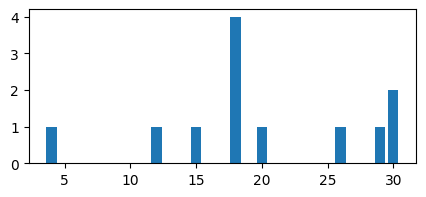

In [10]:
%matplotlib inline
plt.rc('figure', figsize=(5., 2.))
plt.bar(x, y)
plt.show()

In [17]:
with open("content/data/heroes.csv", "r") as heroes_file: #aprire risorsa file
  heroes_reader = csv.reader(heroes_file, delimiter=";", quotechar="\"") #leggo csv
  heroes = list(heroes_reader)[1:] #assegno risultato del reader - header
  print(heroes[:2])

[['A-Bomb', 'Richard Milhouse Jones', 'Scarsdale, Arizona', 'Marvel Comics', '203.21000000000001', '441.94999999999999', 'M', '2008', 'Yellow', 'No Hair', '100', 'moderate'], ['Abraxas', 'Abraxas', 'Within Eternity ', 'Marvel Comics', '', '', 'M', '', 'Blue', 'Black', '100', 'high']]


Il modulo Csv però legge tutto come stringa. Dobbiamo riportare i dati nel tipo originale.

In [18]:
years = [int(h[7]) for h in heroes if h[7]] #per ogni hero in heroes, se l'anno è diverso da None o dal valore zero del tipo (stringa = ''), allora prendi l'anno
years

[2008,
 2007,
 1993,
 1959,
 1965,
 2001,
 1985,
 1980,
 1964,
 1995,
 1986,
 1996,
 1941,
 2005,
 1963,
 1981,
 1984,
 1979,
 1984,
 2004,
 2011,
 2005,
 2005,
 1981,
 1968,
 1965,
 1981,
 1980,
 1963,
 1972,
 2004,
 1975,
 1960,
 1961,
 1986,
 2011,
 1968,
 1964,
 1984,
 2003,
 1994,
 1977,
 1962,
 1972,
 2004,
 1985,
 2001,
 1977,
 1982,
 1975,
 2010,
 1980,
 1993,
 1993,
 1999,
 1993,
 1976,
 1998,
 2000,
 2011,
 1977,
 1992,
 1998,
 1992,
 1966,
 1940,
 1944,
 1965,
 2012,
 1999,
 1998,
 1964,
 1940,
 1980,
 1973,
 1979,
 1995,
 1964,
 1964,
 1994,
 2000,
 1963,
 1941,
 1977,
 1986,
 1976,
 1981,
 1989,
 1959,
 1948,
 2015,
 1940,
 1989,
 2008,
 2007,
 1980,
 1972,
 1981,
 1965,
 1967,
 1971,
 1964,
 1986,
 1963,
 1990,
 1987,
 1968,
 1976,
 1941,
 1963,
 1963,
 2004,
 1963,
 1941,
 2007,
 1989,
 1996,
 1976,
 1975,
 1979,
 1963,
 1985,
 1972,
 1939,
 1947,
 1964,
 2004,
 1975,
 1975,
 2001,
 1975,
 1965,
 1987,
 1985,
 1971,
 1987,
 1959,
 2000,
 2006,
 2004,
 1971,
 1987,
 1963,

Possiamo ora generare il grafico delle frequenze assolute (degli anni):

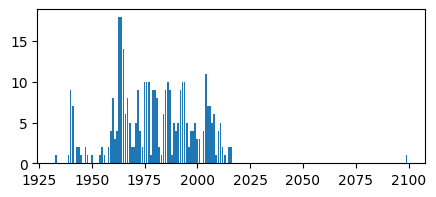

In [19]:
counts = get_sorted_counts(years)
x, y = np.array(counts).transpose()
plt.bar(x, y)
plt.show()

La presenza di un valore outlier va a rovinare il grafico. Possiamo:
- Escluderlo con una list comprehension su `years`:

In [20]:
[year for year in years if year > 2025]

[2099]

- Utilizzare un limite per gli assi con matplotlib:

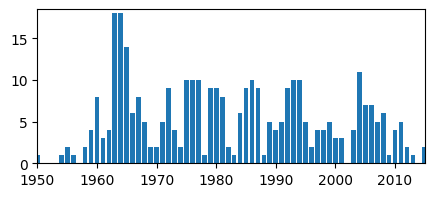

In [21]:
plt.bar(x, y)
plt.xlim((1950, 2015))
plt.ylim((0, 18.5))
plt.show()

### Basi delle statistica descrittiva

Nel corso vedremo: 
- **Statistica descrittiva**: trasformare dati in un indice numerico (o pochi valori numerici) o in una rappresentazione grafica. In questo modo si possono azzardare conclusioni basate sull'indice o la rappresentazione.
- **Calcolo delle probabilità**: strumento matematico che mi permette di formalizzare situazioni nelle quali posso trarre conclusioni facendo stime su qualcosa che non conosco. Parto da un campione di valori e li uso per ottenere una stima di una quantità che non conosco (quanti grammi di farmaco devo dare ad un paziente).
- **Statistica inferenziale**: trarre conclusioni robuste rispetto all'innata incertezza. (?)

**Popolazione**: insieme di individui (o oggetti) sul quale deve essere svolta l'analisi.
**Campione**: sottoinsieme della popolazione che deve essere rappresentativo di quest'ultima. Per essere rappresentativo, un campione non deve avere alcun **bias** (ad esempio prendere come campione delle batterie prodotte in un singolo stabilimento, piuttosto che anche in tutti gli altri stabilimenti).
Vogliamo avere una popolazione divisa in due parti: in questo modo posso verificare l'effetto dell'esperimento in confronto con la parte di popolazione su cui non applico l'esperimento (**gruppo di controllo**).

Esempio: ipotizziamo di avere: 
- 300 studenti nel I anno
- 500 studenti nel II anno
- 600 studenti nel III anno
- 600 studenti nel IV anno
- 2000 studenti in totale

Se la frequenza è espressa come numero assoluto, allora si parla di **frequenza assoluta**.
La **frequenza relativa** relativa si ottiene invece dividendo il valore degli studenti per la frequenza assoluta. La somma delle frequenze relative è sempre 1. La frequenza relativa moltiplicata per 100 risulta essere la percentuale della popolazione.
Per avere un **campione stratificato**, devo avere la stessa frequenza assoluta della popolazione.

### Analisi di tipo quantitativo:

Useremo $x$ per indicare un valore dentro al campione. Avendone tanti li rappresentiamo come {$x_1, x_2, ..., x_n$}. Attenzione alla case-sensitivity, minuscolo e maiuscolo vogliono dire cose differenti in statistica.

Siamo interessati alla **posizione** o **centralità** dei dati: come un dato si distribuisce su una distribuzione.
Usiamo 3 indici di centralità:

#### Media campionaria 
$\overline{x} = \dfrac{1}{n} \sum_{i=1}^{n}x_i$

E' un indice di centralità in quanto è una sorta di baricentro dei dati. Sommando gli scarti dalla media campionaria otteniamo $n$ volte la media campionaria $\overline{x}$: 

$n\overline{x} = \sum_{i=1}^{n}x_i - \sum_{i=1}^{n}\overline{x}$

Lo scarto dalla media campionaria indica quanto il dato è distante dal centro.
Avendo una tabella delle frequenze assolute si ha un altro modo di calcolare la media aritmetica:


#### Mediana campionaria